In [1]:
!pip install -U scikit-learn


In [2]:
!pip install seaborn

### Import required libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.cluster import KMeans

### Read the data and show info

In [28]:
data = pd.read_csv("../Data/fruits_all/fruitDense.csv")
data.head()

,fruit,diameter,weight
0,Apple,7.363885,141.541817
1,Apple,6.608892,143.229432
2,Apple,7.073370,167.295518
3,Apple,6.950858,154.942545
4,Apple,7.247590,130.187309


In [29]:
data.tail()

,fruit,diameter,weight
10045,Apple,6.571942,155.733467
10046,Apple,6.997188,169.632256
10047,Apple,7.208078,174.676053
10048,Apple,6.252150,123.487570
10049,Apple,6.570121,126.942840


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     10050 non-null  object 
 1   diameter  10050 non-null  float64
 2   weight    10050 non-null  float64
dtypes: float64(2), object(1)
memory usage: 235.7+ KB


In [31]:
data.describe()

,diameter,weight
count,10050.000000,10050.000000
mean,6.978577,149.868244
std,0.609339,21.079546
min,0.908926,45.999145
25%,6.662570,134.702105
50%,6.997803,149.353382
75%,7.331728,164.983346
max,8.795541,214.738743


In [32]:
# checking na

data.isna().sum()

fruit       0
diameter    0
weight      0
dtype: int64

<Axes: xlabel='diameter', ylabel='weight'>

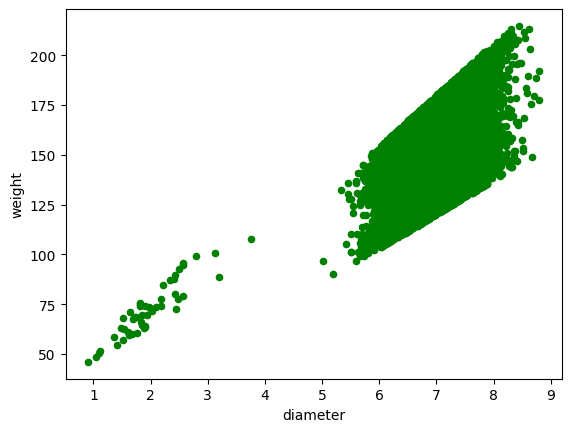

In [33]:
data.plot(kind = "scatter", x="diameter", y="weight", color="green")

<Axes: >

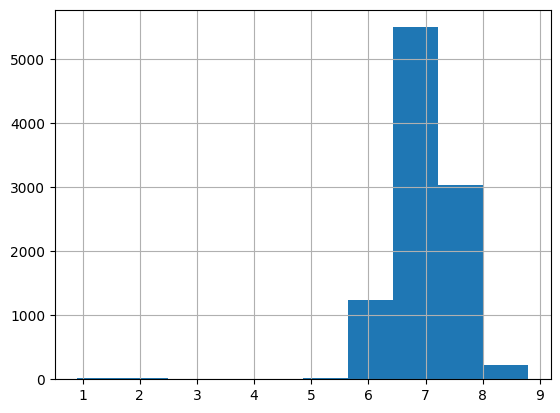

In [34]:
data.diameter.hist()

<Axes: >

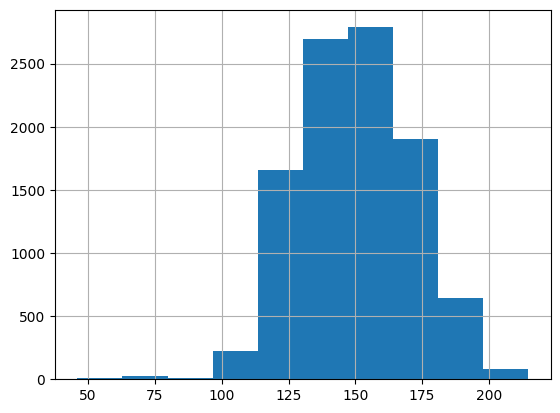

In [35]:
data.weight.hist()

### Using sklearn library, apply KMeans algorithm on the dataframe, with 2 clusters, on the numerical columns

In [41]:
# train
clusters = KMeans(n_clusters=2).fit(data[["weight", "diameter"]])
# predict
pred_labels = clusters.predict(data[["weight", "diameter"]])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
print(pred_labels)

[1 1 0 ... 0 1 1]


### Add the clusters as a cloumn "cluster" to the dataframe

In [43]:
data["cluster"] = pred_labels
data.head()

,fruit,diameter,weight,cluster
0,Apple,7.363885,141.541817,1
1,Apple,6.608892,143.229432,1
2,Apple,7.073370,167.295518,0
3,Apple,6.950858,154.942545,0
4,Apple,7.247590,130.187309,1


### To observe the cluster
- we can plot (with seaborn library for instance, sns.scatterplot) with dot colors corresponding to clusters (hue = "cluster"). Compare with using the fruit information as colors. It should correspond to your intuition

#### predicted results

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='diameter', ylabel='weight'>

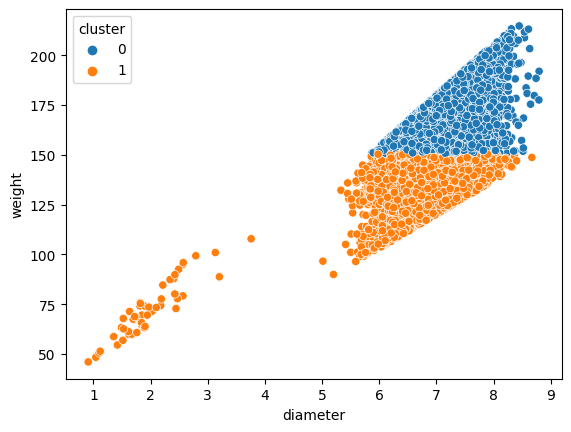

In [44]:
sns.scatterplot(data=data, x = "diameter", y="weight", hue="cluster")

#### the fruit information as color


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='diameter', ylabel='weight'>

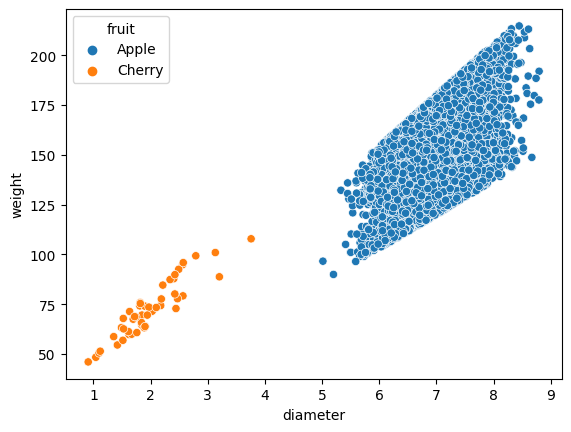

In [40]:
sns.scatterplot(data=data, x="diameter", y="weight", hue="fruit")